Research Question: How do racial/ethnic demographics and socioeconomic factors (such as population size and access to government assistance programs like SNAP) correlate with the prevalence of group quarters in U.S. census tracts, and how does this vary between urban and rural areas?

Data Visualization:

In [1]:
import os
print(os.listdir())

['.Rhistory', 'Lab1.Rmd', '.config', 'Music', 'Commit4.ipynb', '.condarc', '.DS_Store', 'cleaned_health_outcome_data.csv', '.CFUserTextEncoding', 'Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System_20250213.csv', '.xonshrc', 'fd2dbace-3737-c713-a4b7-42dcddc25e7f.png', 'anaconda_projects', 'Untitled.ipynb', '.zshrc', '.local', 'Pictures', 'cleaned_merged_data.csv', '.zprofile', 'Commit3.ipynb', 'Paper1.Rmd', '.zsh_history', '.ipython', 'Desktop', 'Library', '.matplotlib', 'Commit 2 Updated.ipynb', 'Public', '.idlerc', '.tcshrc', '.RData', '.anaconda', 'cleaned_food_access_data.csv', 'Movies', '.Rapp.history', '.Trash', '.ipynb_checkpoints', 'FoodAccessResearchAtlasData2019.csv', '.jupyter', 'Documents', 'cleaned_health_outcome_data1.csv', '.bash_profile', 'Downloads', '.python_history', '.continuum', 'cleaned_food_access_data1.csv', '.zsh_sessions', 'Assignment1.ipynb', '.conda', 'Midterm Exam.ipynb']


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the datasets
food_access_data = pd.read_csv("FoodAccessResearchAtlasData2019.csv")
food_access_data.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [15]:
df = pd.read_csv("FoodAccessResearchAtlasData2019.csv")

In [17]:
df['Urban'] = df['Urban'].astype('category')  # Urban indicator as categorical variable
df['GroupQuartersFlag'] = df['GroupQuartersFlag'].astype('category')  # Group quarters flag as categorical variable

In [19]:
df['PCTGQTRS'] = df['NUMGQTRS'] / df['Pop2010'] * 100  # Proportion of group quarters in the population

In [21]:
df_filtered = df[['Urban', 'TractWhite', 'TractBlack', 'TractAsian', 'TractHispanic', 'TractSNAP', 'PCTGQTRS']]

In [23]:
df_grouped = df_filtered.groupby('Urban').agg({
    'TractWhite': 'mean',
    'TractBlack': 'mean',
    'TractAsian': 'mean',
    'TractHispanic': 'mean',
    'TractSNAP': 'mean',
    'PCTGQTRS': 'mean'
}).reset_index()

/var/folders/c4/mwls6lk56m99nbxsclf1gczc0000gp/T/ipykernel_78163/3408327477.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_filtered.groupby('Urban').agg({


/var/folders/c4/mwls6lk56m99nbxsclf1gczc0000gp/T/ipykernel_78163/1397484182.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Urban', y='PCTGQTRS', data=df_grouped, hue='Urban', ci=None)


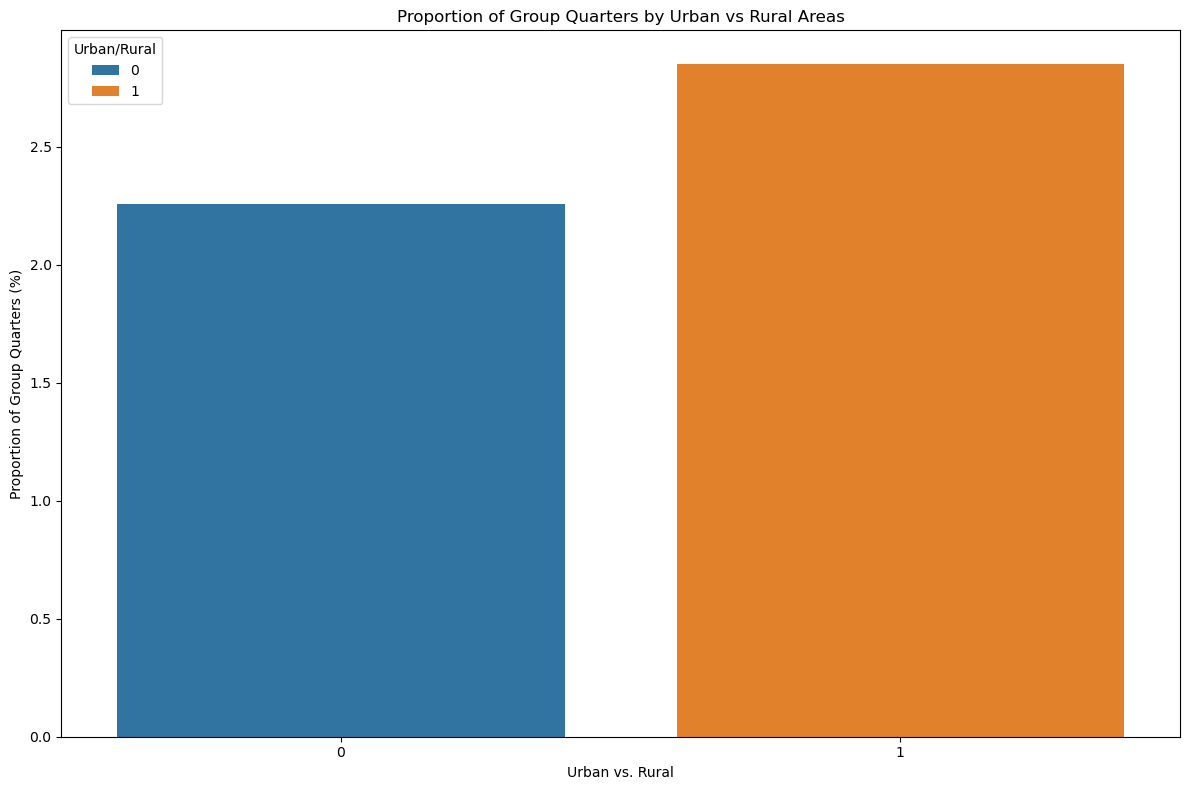

In [25]:
# Plotting: Relationship between Urban vs. Rural and the proportion of group quarters (PCTGQTRS)
plt.figure(figsize=(12, 8))

sns.barplot(x='Urban', y='PCTGQTRS', data=df_grouped, hue='Urban', ci=None)
plt.title('Proportion of Group Quarters by Urban vs Rural Areas')
plt.xlabel('Urban vs. Rural')
plt.ylabel('Proportion of Group Quarters (%)')
plt.legend(title='Urban/Rural')
plt.tight_layout()
plt.show()

In [27]:
# Additional Plot: Comparing group quarters by racial/ethnic demographics and urban/rural status
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Urban', ylabel='TractWhite'>

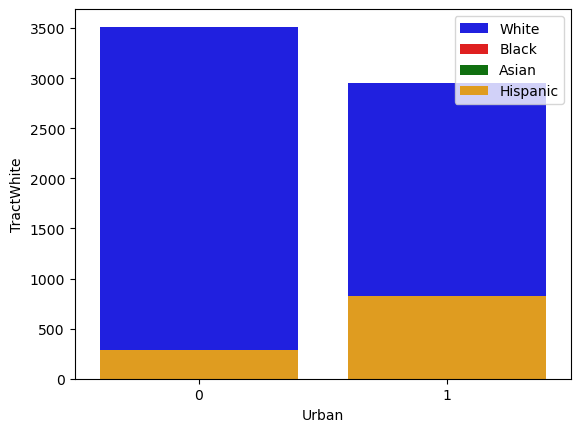

In [29]:
# Plot for racial/ethnic groups and their group quarter proportion across Urban vs Rural
sns.barplot(x='Urban', y='TractWhite', data=df_grouped, label='White', color='blue')
sns.barplot(x='Urban', y='TractBlack', data=df_grouped, label='Black', color='red')
sns.barplot(x='Urban', y='TractAsian', data=df_grouped, label='Asian', color='green')
sns.barplot(x='Urban', y='TractHispanic', data=df_grouped, label='Hispanic', color='orange')

/var/folders/c4/mwls6lk56m99nbxsclf1gczc0000gp/T/ipykernel_78163/1926010683.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Race/Ethnicity')


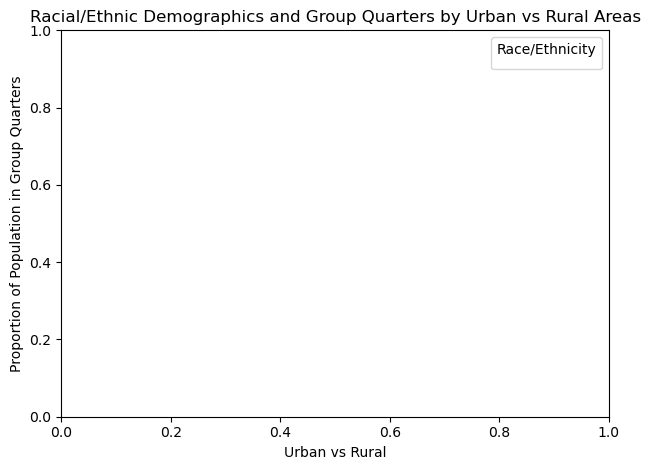

In [31]:
plt.title('Racial/Ethnic Demographics and Group Quarters by Urban vs Rural Areas')
plt.xlabel('Urban vs Rural')
plt.ylabel('Proportion of Population in Group Quarters')
plt.legend(title='Race/Ethnicity')
plt.tight_layout()
plt.show()

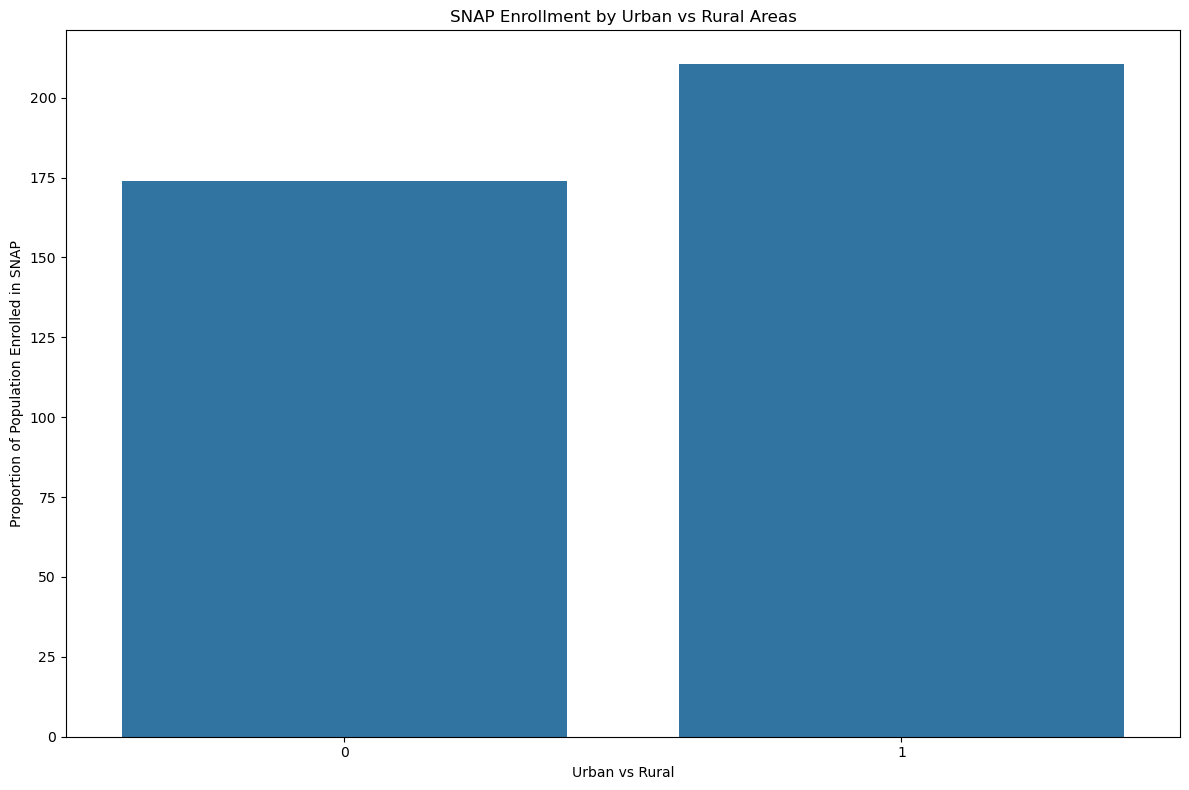

In [33]:
plt.figure(figsize=(12, 8))

sns.barplot(x='Urban', y='TractSNAP', data=df_grouped)
plt.title('SNAP Enrollment by Urban vs Rural Areas')
plt.xlabel('Urban vs Rural')
plt.ylabel('Proportion of Population Enrolled in SNAP')
plt.tight_layout()
plt.show()